# Heuristic 4 

In [ ]:
#importing all the necessary libraries
import pickle
import random
import matplotlib.pyplot as plt
# open a file, where you stored the pickled data
file = open('carts', 'rb')
carts = pickle.load(file)
#carts-> dictionary key-> experiment no. [0,9] values-> list of lists
#key-> experiment no. and  value is list carts,
# print(carts)

In [21]:
file1 = open('prices', 'rb')
prices = pickle.load(file1)
#prices->dictionary key-> product no. [0-499], value-> random no. [100,1000]
# print(prices)

In [22]:
file2 = open('weights', 'rb')
weights = pickle.load(file2)
#weights -> dictionary key-> product no. [0-499], value-> random no. [0,2]
# print(weights)

In [23]:
file3 = open('f', 'rb')
f_vals = pickle.load(file3)
#The function f_val representsthe number of times item u has been purchased alone
# print(f_vals)

In [24]:
file4 = open('g', 'rb')
g_vals = pickle.load(file4)
#g_vals represents the number of times u and v areco-purchased.

In [25]:
file5 = open('adj_list', 'rb')
adj_lists = pickle.load(file5)

In [26]:
for e in range(10):
    rev=0
    for p in range(500):
        rev+=prices[p]*(f_vals[e][p])
        for n in adj_lists[e][p]:
            if n<p:
                rev+=(prices[p]*g_vals[e][(n,p)])
            else:
                rev+=(prices[p]*g_vals[e][(p,n)])
print(rev/10) # average revenue without changing price

542599.2461179008


In [38]:
delta_u=random.uniform(0,0.07) # selecting delta u from 0 to 0.07

revenues={}
updated_price={} 
print("Value of delta u taken is ",delta_u)
delta_v=0 # delta v will be 0 as we are considering single item and not copurchased items
for i in range(len(prices)):
    new_price=prices[i]*(1+delta_u) # price change for only one item at each iteration
    updated_price[i]=new_price
    avg_revenue=0
    for exp in range(10): # calculating average revenue by performing 10 experiments
        final_revenue=0
        new_f=f_vals[exp][i]*(1-delta_u) # f(u) changes to f'(u)=f(u) *(1 - delta(u))
        sum_of_new_gvals=0
        for j in range(len(prices)):
            if (i,j) in g_vals[exp].keys():
                val=g_vals[exp].get((i,j))
            elif (j,i) in g_vals[exp].keys():
                val=g_vals[exp].get((j,i))
            new_g= val*(1-(weights[i]*delta_u)) # g(u,v) changes to g'(u, v) = g(u, v) * (1 - (w(u)*delta(u) + w(v)delta(v))
            sum_of_new_gvals+=new_g
        final_revenue+=new_price*(new_f+sum_of_new_gvals)
        for item in range(len(prices)):
            if i!=item: #if new item is not equal to updated item then dont update price and f,g values
                price=prices[item]
                f_val=f_vals[exp][item]
                sum_of_new_gvals=0
                for other_item in range(len(prices)):
                    if (item,other_item) in g_vals[exp].keys():
                        new_g1= g_vals[exp].get((item,other_item))
                    elif (other_item,item) in g_vals[exp].keys():
                        new_g1=g_vals[exp].get((other_item,item))
                    sum_of_new_gvals+=new_g1
                     # g(u,v) changes to g'(u, v) = g(u, v) * (1 - (w(u)*delta(u) + w(v)delta(v))
                final_revenue+=(price*(f_val+sum_of_new_gvals))
        avg_revenue+=final_revenue
    avg_revenue=avg_revenue/10 # calculating avg revenue over 10 experiments by changing price of only one item at a time
    print("After changing price of item ", i, " the revenue is", avg_revenue)
    revenues[i]=avg_revenue
    
                

Value of delta u taken is  0.06114793872736584
After changing price of item  0  the revenue is 5483353.0524417255
After changing price of item  1  the revenue is 5482200.815838101
After changing price of item  2  the revenue is 5482486.219011805
After changing price of item  3  the revenue is 5482690.758108116
After changing price of item  4  the revenue is 5482727.442664364
After changing price of item  5  the revenue is 5483065.4632250555
After changing price of item  6  the revenue is 5482976.696579196
After changing price of item  7  the revenue is 5482668.957149275
After changing price of item  8  the revenue is 5482427.889142124
After changing price of item  9  the revenue is 5482906.930532152
After changing price of item  10  the revenue is 5482837.163881567
After changing price of item  11  the revenue is 5482582.334972772
After changing price of item  12  the revenue is 5483145.235957054
After changing price of item  13  the revenue is 5482852.428309972
After changing price of

In [42]:
sorted_revenues=dict(sorted(revenues.items(), key=lambda item: item[1]))
# print("Items in decresing order of revenues: ",sorted_revenues)
revenue_list=[] # contains avg revenue by Ordering the items statically based on the maximum increase in revenue 
#that can achieved by varying respective item prices.
items_taken=[] #  items whose updated price is to be taken


count=0
for i in sorted_revenues.keys():
    items_taken.append(i)
#     print("updated price items taken are: ", items_taken)
    items_not_taken=[]  # items whose original price is to be taken
    for key in sorted_revenues.keys():
        if key not in items_taken:
            items_not_taken.append(key)
    avg_revenue1=0
    for exp in range(10):  # calculating average revenue by performing 10 experiments s
        final_revenue1=0
        for item1 in items_taken:
            price1=updated_price[item1]
#             f_val1=f_vals[exp][item1]*(1-delta_u)
            f_val1=f_vals[exp][item1]
            sum_of_new_gvals1=0
            for item2 in range(len(prices)):
                if (item1,item2) in g_vals[exp].keys():
                    new_g2=g_vals[exp].get((item1,item2))
                elif (item2,item1) in g_vals[exp].keys():
                    new_g2=g_vals[exp].get((item2,item1))
                sum_of_new_gvals1+=new_g2
            final_revenue1+=(price1*(f_val1+sum_of_new_gvals1))
        for item3 in items_not_taken:
            price2=prices[item3]
            f_val2=f_vals[exp][item3]
            sum_of_new_gvals2=0
            for item4 in range(len(prices)):
                if (item3,item4) in g_vals[exp].keys():
                    new_g3=g_vals[exp].get((item3,item4))
                elif (item4,item3) in g_vals[exp].keys():
                    new_g3=g_vals[exp].get((item4,item3))
                sum_of_new_gvals2+=new_g3
            final_revenue1+=(price2*(f_val2+sum_of_new_gvals2))
        avg_revenue1+=final_revenue1
    avg_revenue1=avg_revenue1/10
    print("Avg revenue after iteration ", count, " is", avg_revenue1)
    revenue_list.append(avg_revenue1)
    count+=1
    if count==200:
        break
    
    

Avg revenue after iteration  0  is 5484403.163234556
Avg revenue after iteration  1  is 5485555.649739991
Avg revenue after iteration  2  is 5486695.65434357
Avg revenue after iteration  3  is 5487887.549965242
Avg revenue after iteration  4  is 5489102.6884811055
Avg revenue after iteration  5  is 5490296.302359858
Avg revenue after iteration  6  is 5491337.375242835
Avg revenue after iteration  7  is 5492402.257934165
Avg revenue after iteration  8  is 5493462.227340499
Avg revenue after iteration  9  is 5494438.21570532
Avg revenue after iteration  10  is 5495509.266582765
Avg revenue after iteration  11  is 5496726.960519787
Avg revenue after iteration  12  is 5497962.507209001
Avg revenue after iteration  13  is 5499160.95478378
Avg revenue after iteration  14  is 5500202.724186351
Avg revenue after iteration  15  is 5501056.42278851
Avg revenue after iteration  16  is 5502138.460023467
Avg revenue after iteration  17  is 5503164.2594991755
Avg revenue after iteration  18  is 5504

In [43]:
file_name = "revenue_h4.pkl"

# open_file = open(file_name, "wb")
# pickle.dump(revenue_list, open_file)

In [79]:
open_file = open(file_name, "rb")
final_revenue_list = pickle.load(open_file)


In [80]:
open_file1 = open("result_1_08", "rb")
final_revenue_list1 = pickle.load(open_file1)

In [81]:
open_file2 = open("result_12_52", "rb")
final_revenue_list2 = pickle.load(open_file2)

In [82]:
open_file3 = open("result", "rb")
final_revenue_list3 = pickle.load(open_file3)

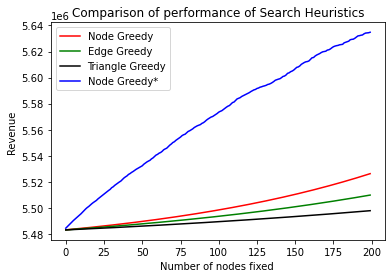

In [85]:

x_axis=[]
for i in range(200):
    x_axis.append(i)

plt.figure()
plt.title("Comparison of performance of Search Heuristics")
plt.xlabel("Number of nodes fixed ")
plt.ylabel("Revenue")
plt.plot(x_axis, final_revenue_list1,c='red',label='Node Greedy')
plt.plot(x_axis, final_revenue_list2,c='green',label='Edge Greedy')
plt.plot(x_axis, final_revenue_list3,c='black',label='Triangle Greedy')
plt.plot(x_axis, final_revenue_list,c='blue',label='Node Greedy*')
plt.legend()
plt.show()